In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('iris-data.csv')
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
corrmatrix = df.corr()
corrmatrix.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


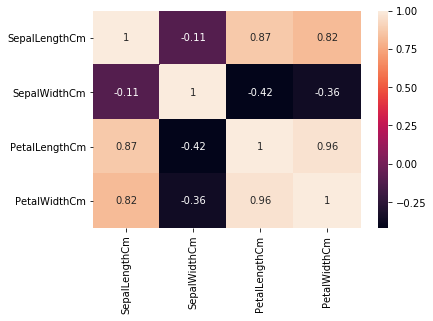

In [4]:
sb.heatmap(corrmatrix, annot=True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


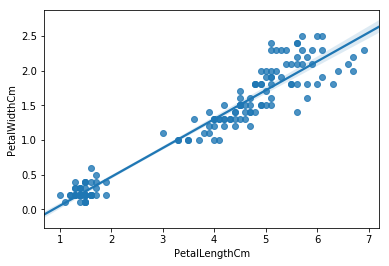

In [5]:
# We have maximum correlation between petal length and and petal width attributes.

sb.regplot(data=df, x='PetalLengthCm', y='PetalWidthCm')

In [6]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
x = df[['PetalLengthCm']].values
y = df['PetalWidthCm'].values

xa_train, xa_test, ya_train, ya_test = train_test_split(x, y, test_size=0.3) 

lreg = LinearRegressionGD()
lreg.fit(x, y)

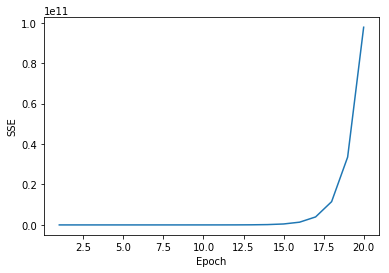

In [8]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

lreg = LinearRegressionGD()
lreg.fit(x_std, y_std)

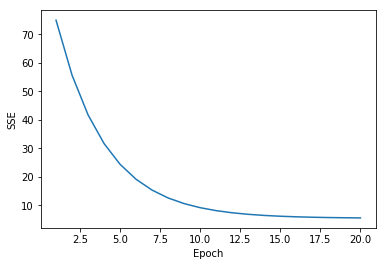

In [10]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

Slope: 0.925
Intercept: -0.000


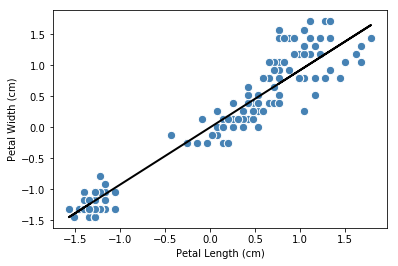

In [12]:
print('Slope: %.3f' % lreg.w_[1])
print('Intercept: %.3f' % lreg.w_[0])

lin_regplot(x_std, y_std, lreg)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Slope: 0.417
Intercept: -0.370
Accuracy: 0.92


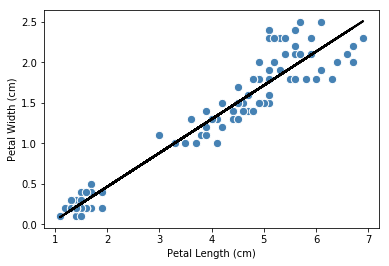

In [13]:
# Using sklearn

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xa_train, ya_train)
y_pred = slr.predict(xa_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(xa_test, ya_test))

lin_regplot(xa_train, ya_train, slr)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

Slope: 0.929
Intercept: 0.000
Accuracy: 0.94


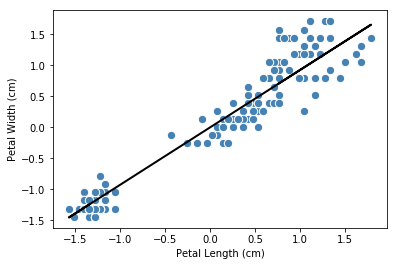

In [14]:
slr = LinearRegression()
slr.fit(x_train, y_train)
y_pred = slr.predict(x_test)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(x_test, y_test))

lin_regplot(x_std, y_std, slr)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

Slope: 0.928
Intercept: 0.000
Accuracy: 0.94


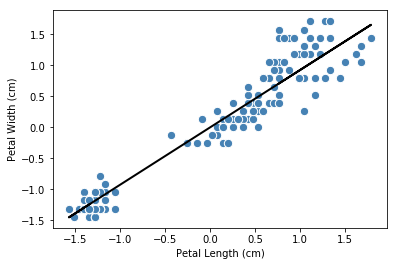

In [15]:
# Ridge regression

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.1)
rdg.fit(x_train, y_train)
y_pred = rdg.predict(x_test)
print('Slope: %.3f' % rdg.coef_[0])
print('Intercept: %.3f' % rdg.intercept_)

print('Accuracy: %.2f' % rdg.score(x_test, y_test))

lin_regplot(x_std, y_std, rdg)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

Slope: 0.820
Intercept: 0.007
Accuracy: 0.91


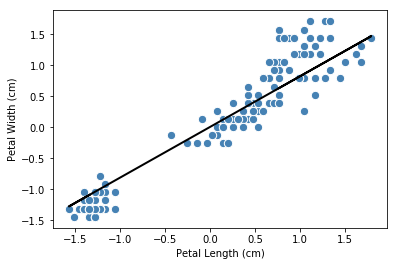

In [16]:
# Lasso regression

from sklearn.linear_model import Lasso

las = Lasso(alpha=0.1)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

print('Slope: %.3f' % las.coef_[0])
print('Intercept: %.3f' % las.intercept_)

print('Accuracy: %.2f' % las.score(x_test, y_test))

lin_regplot(x_std, y_std, las)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [17]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,)
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

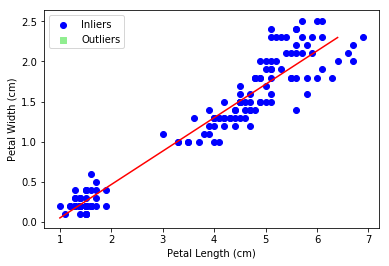

In [18]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(x.min(), x.max(),1.8)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(x[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers') 
plt.scatter(x[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='red')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.show()

In [19]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
print('Score: %.3f' % ransac.score(x,y))

Slope: 0.416
Intercept: -0.367
Score: 0.927
